In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df=pd.concat([train,test])


In [50]:
train.shape,test.shape,df.shape
#891+418=1309
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.0,0,0,13.0000,2
887,888,1.0,1,0,19.0,0,0,30.0000,2
888,889,0.0,3,0,19.0,1,2,23.4500,2
889,890,1.0,1,1,26.0,0,0,30.0000,0


In [51]:
df=df.drop(columns=["Name","Ticket"],axis=1)

KeyError: "['Name' 'Ticket'] not found in axis"

In [52]:
df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.065571
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.167675
Name: Survived, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 101.9 KB


columns with NUll values  -AGE,CABIN

In [54]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [55]:
df=df.drop(columns=["Cabin"],axis=1)

KeyError: "['Cabin'] not found in axis"

In [56]:
	df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])


In [57]:
# df = df.fillna(method='ffill', axis=0)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 101.9 KB


In [59]:
# import numpy as np
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# data=df.drop(df["Survived"], axis=1)
# imputer.fit(data.values)
# df["Survived"] = imputer.transform(df["Survived"])


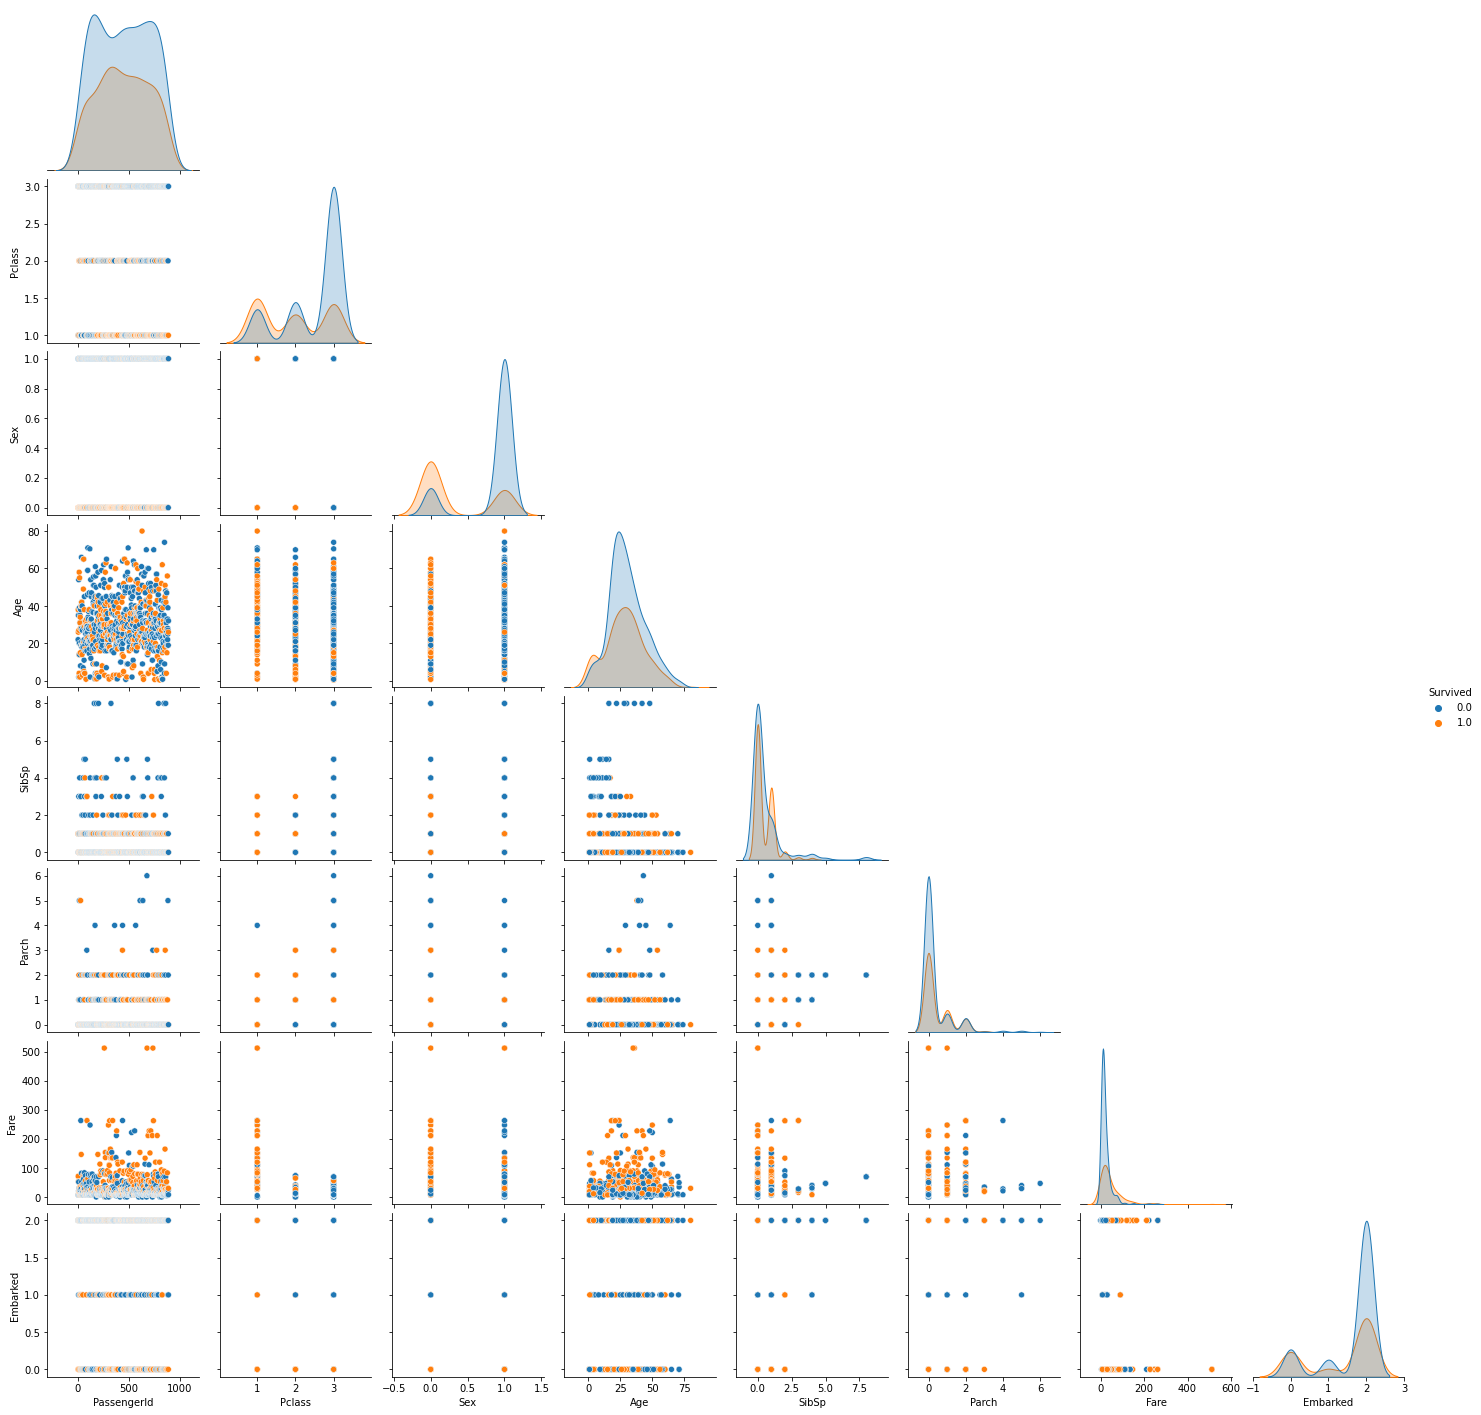

In [60]:
df = df[~df.index.duplicated(keep='first')]
import seaborn as sns
sns.pairplot(df,corner = True, hue = 'Survived');


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

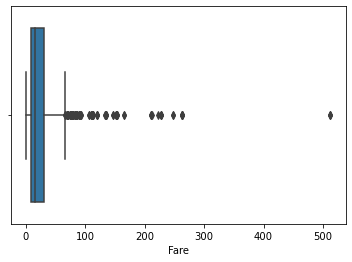

In [40]:
sns.boxplot(df.Fare)


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

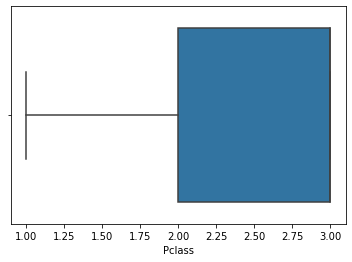

In [41]:
sns.boxplot(df.Pclass)


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

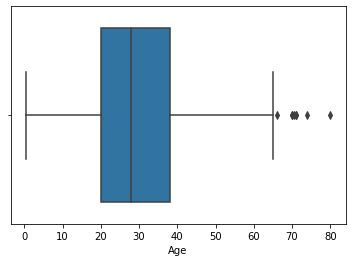

In [42]:
sns.boxplot(df.Age)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 101.9 KB


In [44]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Embarked']=le.fit_transform(df['Embarked'])

In [45]:
# define the lower and upper bounds using Tukey's method
q1, q3 = np.percentile(df, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers with values outside the bounds
filtered_data = df[(df >= lower_bound) & (df <= upper_bound)]


In [46]:
filtered_data 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3,1,22.0,1,0,7.250,2
1,2.0,1.0,1,0,38.0,1,0,NaN,0
2,3.0,1.0,3,0,26.0,0,0,7.925,2
3,4.0,1.0,1,0,35.0,1,0,NaN,2
4,5.0,0.0,3,1,35.0,0,0,8.050,2
...,...,...,...,...,...,...,...,...,...
886,NaN,0.0,2,1,27.0,0,0,13.000,2
887,NaN,1.0,1,0,19.0,0,0,30.000,2
888,NaN,0.0,3,0,19.0,1,2,23.450,2
889,NaN,1.0,1,1,26.0,0,0,30.000,0
